In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.colors as mcolors
import healpy as hp
import math
from shapely.geometry import Point, Polygon

([0.7071067811865474, -1.3691967456605065e-16, 0.0, 0.7453559924999299], [-0.7071067811865477, -0.7453559924999299, 0.0, 0.0], [0.0, -0.6666666666666666, -1.0, -0.6666666666666666])
4025
[ 0.70710678 -0.70710678  0.        ]


/tmp/ipykernel_18590/4250558319.py:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(new_x, new_y, new_z, c=np.random.rand(3,), s=1)


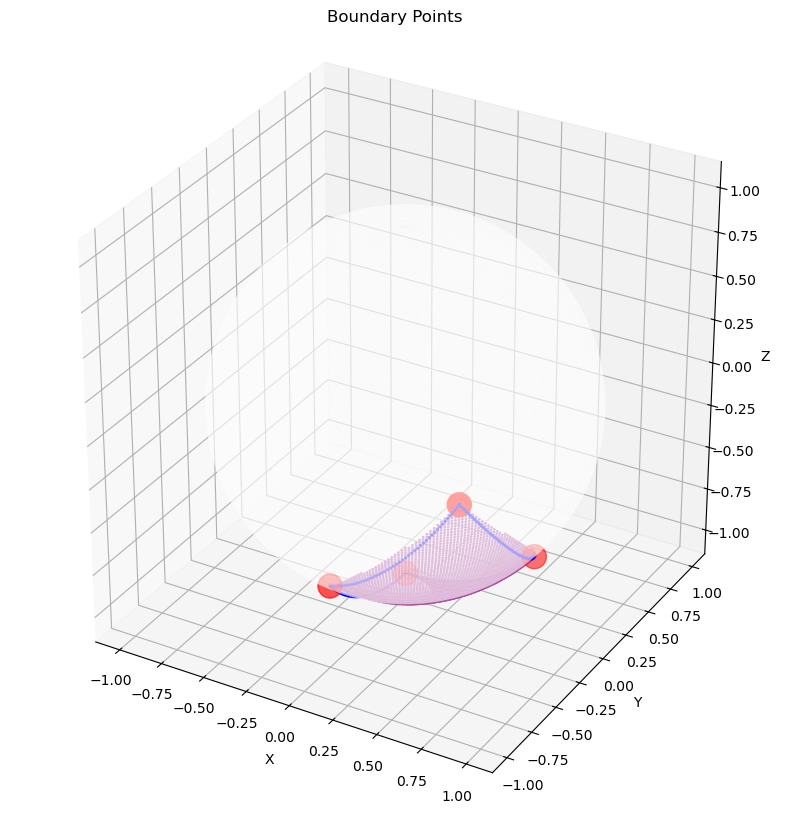

In [153]:
def main(order, index):
    i =index
    # Create points for sphere
    theta = np.linspace(0, 2 * np.pi, 100)
    phi = np.linspace(0, np.pi, 50)
    theta, phi = np.meshgrid(theta, phi)
    r = 1
    # Convert to Cartesian coordinates
    x = r * np.sin(phi) * np.cos(theta)
    y = r * np.sin(phi) * np.sin(theta)
    z = r * np.cos(phi)
    
    # Plot sphere
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, z, cmap = mcolors.ListedColormap(['white']), alpha=0.4)
    
    
    points = getBoundaries(order, i)
    ax.scatter(points[0], points[1], points[2], c='red', s=300)
    print(points)
    #for i in range(hp.order2npix(order)):
    new_x, new_y, new_z = getPoints(order, i)
    
    print(len(new_x))
    ax.scatter(new_x, new_y, new_z, c=np.random.rand(3,), s=1)
    
    p1, p2, p3, p4= np.transpose(points)
    print(p1)
    
    arc12 = great_circle_arc(p1, p2)
    arc23 = great_circle_arc(p2, p3)
    arc34 = great_circle_arc(p3, p4)
    arc41 = great_circle_arc(p4, p1)
        
    # Plot the arcs
    ax.scatter(arc12[:, 0], arc12[:, 1], arc12[:, 2], color='blue', s = 2)
    ax.scatter(arc23[:, 0], arc23[:, 1], arc23[:, 2], color='blue', s =2)
    ax.scatter(arc34[:, 0], arc34[:, 1], arc34[:, 2], color='blue', s =2)
    ax.scatter(arc41[:, 0], arc41[:, 1], arc41[:, 2], color='blue', s = 2)

        
        
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Boundary Points')
    ax.set_box_aspect((1, 1, 1))
    plt.show()

main(0,11)

In [4]:
def getBoundaries(order, i):
    x_coor = []
    y_coor = []
    z_coor = []
    #for i in range(hp.order2npix(order)):
    test = hp.boundaries(hp.order2nside(order), i, step=1)
    x_coor.extend(test[0])
    y_coor.extend(test[1])
    z_coor.extend(test[2])
    
    return x_coor, y_coor, z_coor

In [29]:
def getPoints(order, i):
    x_coor = []
    y_coor = []
    z_coor = []

    test = hp.boundaries(hp.order2nside(order), i, step=1)
    x_coor.extend(test[0])
    y_coor.extend(test[1])
    z_coor.extend(test[2])
    thetas = []
    phis = []
    thetaTrans = False
    phiTrans = False
    for i in range(4):
        # th, ph = cartesian_to_spherical(test[0][i], test[1][i], test[2][i])
        #     # Calculate theta (azimuthal angle)
        theta = math.atan2(test[1][i], test[0][i])
        phi = math.acos(test[2][i])


        thetas.append(math.degrees(theta))
        phis.append(math.degrees(phi))
     
    #create a polygon out of the boundaries    
    both = np.vstack((thetas, phis))
    polygon = Polygon(both.T)
    x, y = polygon.exterior.xy
    points = []
    
    #Find all the points inside the polygon
    for i in range (int(np.min(x)),int(np.max(x)), 1 ):
        for j in range(int(np.min(y)), int(np.max(y)), 1):
            if(polygon.contains(Point(i, j))):
                points.append((i, j))
                
    # if(thetaTrans):
        
    # if(phiTrans):
        
    #convert degrees to radians            
    rad_points = []
    for i in range(len(points)):
        rad_points.append((math.radians(points[i][0]), math.radians(points[i][1])))
    
    #convert theta and phi back into x, y, and z
    new_x = []
    new_y = []
    new_z = []
    for i in range(len(rad_points)):
        theta = rad_points[i][0]
        phi = rad_points[i][1]
        new_x.append(math.sin(phi) * math.cos(theta))
        new_y.append(math.sin(phi) * math.sin(theta))
        new_z.append( math.cos(phi))
                
                    
    return new_x, new_y, new_z
    

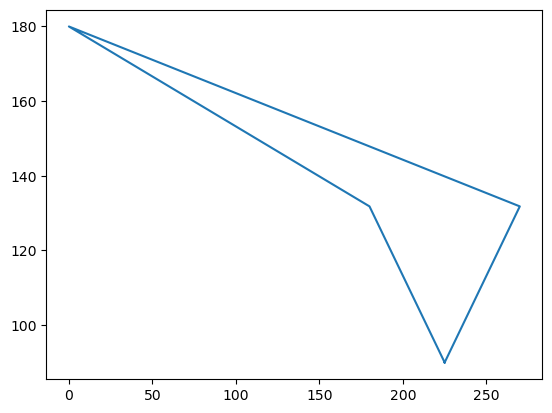

In [50]:


test = hp.boundaries(hp.order2nside(0), 10, step=1)
x_coor = []
y_coor = []
z_coor = []
x_coor.extend(test[0])
y_coor.extend(test[1])
z_coor.extend(test[2])
thetas = []
phis = []
for i in range(4):
    # th, ph = cartesian_to_spherical(test[0][i], test[1][i], test[2][i])
    #     # Calculate theta (azimuthal angle)
    theta = math.atan2(test[1][i], test[0][i])
    if(theta < 0):
        theta = theta + 2 *math.pi 
    phi = math.acos(test[2][i])

    thetas.append(math.degrees(theta))
    phis.append(math.degrees(phi))
    
#create a polygon out of the boundaries    
both = np.vstack((thetas , phis))
polygon = Polygon(both.T)
x, y = polygon.exterior.xy
    # Plot the polygon
plt.plot(x, y)
plt.show()


The code above was used to look at the shape of the 2d polygon created using the boundary points

In [51]:
both

array([[225.       , 180.       ,   0.       , 270.       ],
       [ 90.       , 131.8103149, 180.       , 131.8103149]])

([0.0, 0.7453559924999299, 0.7071067811865476, 4.5639891522016886e-17], [0.0, 0.0, 0.7071067811865475, 0.7453559924999299], [1.0, 0.6666666666666666, 0.0, 0.6666666666666666])
4025
[0. 0. 1.]


/tmp/ipykernel_18590/98712990.py:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(new_x, new_y, new_z, c=np.random.rand(3,), s=1)


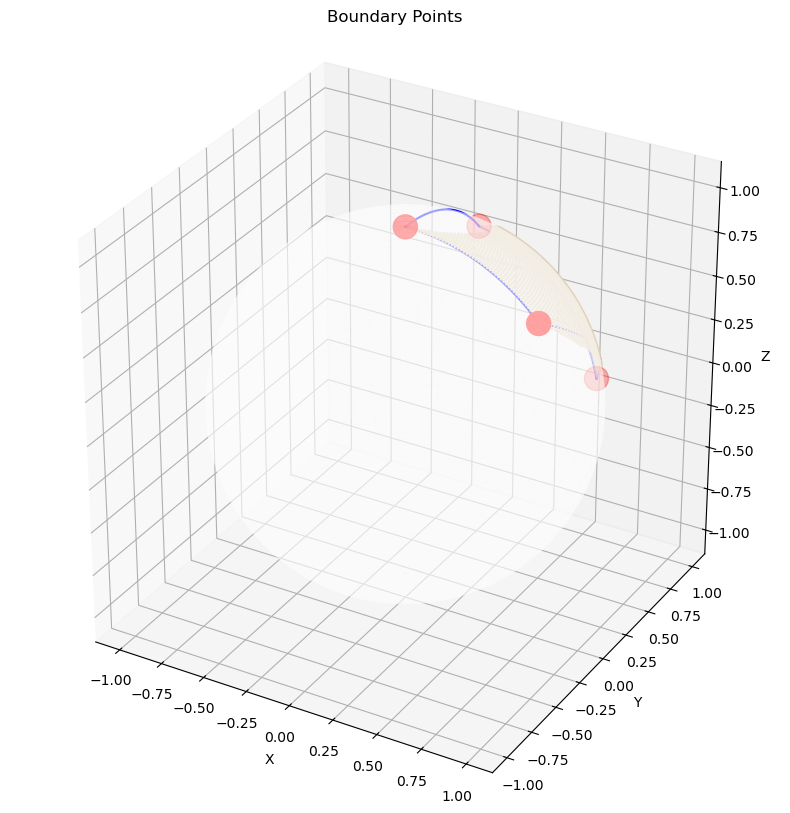

In [129]:
main(0, 0)

In [ ]:
main(5, 0)

In [82]:
def spherical_to_cartesian(lat, lon, r=1):
    """Converts spherical coordinates to Cartesian coordinates."""
    lat_rad = np.radians(lat)
    lon_rad = np.radians(lon)
    x = r * np.cos(lat_rad) * np.cos(lon_rad)
    y = r * np.cos(lat_rad) * np.sin(lon_rad)
    z = r * np.sin(lat_rad)
    return np.array([x, y, z])
def great_circle_arc(p1, p2, num_points=50):
    """Generates points along a great circle arc between two points."""
    p1_norm = p1 / np.linalg.norm(p1)
    p2_norm = p2 / np.linalg.norm(p2)
    points = []
    for i in range(num_points):
        t = i / (num_points - 1)
        # Linear interpolation and normalization
        pt = (1 - t) * p1_norm + t * p2_norm
        pt_norm = pt / np.linalg.norm(pt)
        points.append(pt_norm)
    return np.array(points)

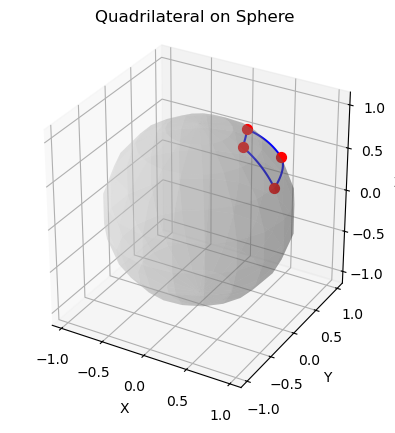

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Example: Define four points on the sphere
p1 = spherical_to_cartesian(30, 0)
p2 = spherical_to_cartesian(30, 45)
p3 = spherical_to_cartesian(60, 45)
p4 = spherical_to_cartesian(60, 0)

# Generate points for each side of the quadrilateral
arc12 = great_circle_arc(p1, p2)
arc23 = great_circle_arc(p2, p3)
arc34 = great_circle_arc(p3, p4)
arc41 = great_circle_arc(p4, p1)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the sphere
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
ax.plot_surface(x, y, z, color="lightgray", alpha=0.3)

# Plot the arcs
ax.plot(arc12[:, 0], arc12[:, 1], arc12[:, 2], color='blue')
ax.plot(arc23[:, 0], arc23[:, 1], arc23[:, 2], color='blue')
ax.plot(arc34[:, 0], arc34[:, 1], arc34[:, 2], color='blue')
ax.plot(arc41[:, 0], arc41[:, 1], arc41[:, 2], color='blue')

# Plot the points
ax.scatter(*p1, color='red', s=50)
ax.scatter(*p2, color='red', s=50)
ax.scatter(*p3, color='red', s=50)
ax.scatter(*p4, color='red', s=50)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Quadrilateral on Sphere')
ax.set_aspect('equal')  # Ensure the sphere appears spherical
plt.show()

This code was used to create a 3d quadrilateral on the sphere

In [24]:
np.shape(arc12)

(50, 3)

(200, 3)


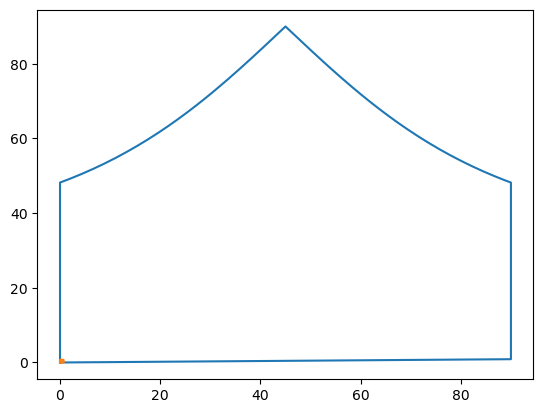

In [130]:

x_coor = []
y_coor = []
z_coor = []

points = getBoundaries(0,0)
# x_coor.extend(test[0])
# y_coor.extend(test[1])
# z_coor.extend(test[2])
    
p1, p2, p3, p4= np.transpose(points)
arc12 = great_circle_arc(p1, p2)
arc23 = great_circle_arc(p2, p3)
arc34 = great_circle_arc(p3, p4)
arc41 = great_circle_arc(p4, p1)
test = arc12
test = np.vstack((test,arc23))
test = np.vstack((test, arc34))
test = np.vstack((test, arc41))
print(np.shape(test))
thetas = []
phis = []
for i in range(np.shape(test)[0]):
    # th, ph = cartesian_to_spherical(test[0][i], test[1][i], test[2][i])
    #     # Calculate theta (azimuthal angle)
    theta = math.atan2(test[i][1], test[i][0])
    phi = math.acos(test[i][2])


    thetas.append(math.degrees(theta))
    phis.append(math.degrees(phi))
    

    

#create a polygon out of the boundaries    
both = np.vstack((thetas, phis))
polygon = Polygon(both.T)
p = Polygon([p1, p2, p3, p4])
q, r = p.exterior.xy
x, y = polygon.exterior.xy
points = []
# Plot the polygon
plt.plot(x, y)

plt.show()


In [127]:
newThetas = []
newPhis = []
theta = math.atan2(p1[1], p1[0])
phi = math.acos(p1[2])


newThetas.append(math.degrees(theta))
newPhis.append(math.degrees(phi))

theta = math.atan2(p2[1], p2[0])
phi = math.acos(p2[2])


newThetas.append(math.degrees(theta))
newPhis.append(math.degrees(phi))

theta = math.atan2(p3[1], p3[0])
phi = math.acos(p3[2])


newThetas.append(math.degrees(theta))
newPhis.append(math.degrees(phi))

theta = math.atan2(p4[1], p4[0])
phi = math.acos(p4[2])


newThetas.append(math.degrees(theta))
newPhis.append(math.degrees(phi))


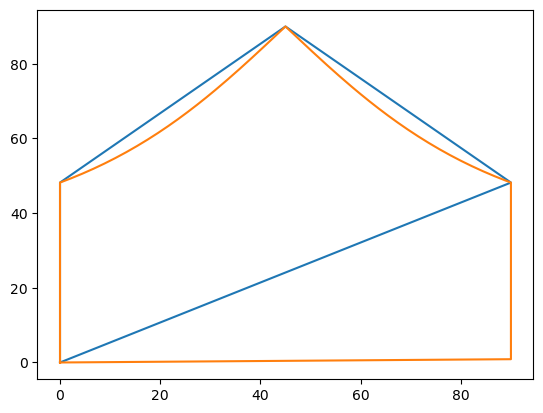

In [131]:
#create a polygon out of the boundaries    
b = np.vstack((newThetas, newPhis))
p = Polygon(b.T)
q, r = p.exterior.xy
plt.plot(q, r)
plt.plot(x, y)
plt.show()

In [166]:
def polyCompare(order, i):
    points = getBoundaries(order,i)
    # x_coor.extend(test[0])
    # y_coor.extend(test[1])
    # z_coor.extend(test[2])
        
    p1, p2, p3, p4= np.transpose(points)
    arc12 = great_circle_arc(p1, p2)
    arc23 = great_circle_arc(p2, p3)
    arc34 = great_circle_arc(p3, p4)
    arc41 = great_circle_arc(p4, p1)
    test = arc12
    test = np.vstack((test,arc23))
    test = np.vstack((test, arc34))
    test = np.vstack((test, arc41))
    thetas = []
    phis = []
    for i in range(np.shape(test)[0]):
        # th, ph = cartesian_to_spherical(test[0][i], test[1][i], test[2][i])
        #     # Calculate theta (azimuthal angle)
        theta = math.atan2(test[i][1], test[i][0])
        phi = math.acos(test[i][2])


        thetas.append(math.degrees(theta))
        phis.append(math.degrees(phi))
        

        

    #create a polygon out of the boundaries    
    both = np.vstack((thetas, phis))
    polygon = Polygon(both.T)
    x, y = polygon.exterior.xy


    newThetas = []
    newPhis = []
    theta = math.atan2(p1[1], p1[0])
    phi = math.acos(p1[2])
    newThetas.append(math.degrees(theta))
    newPhis.append(math.degrees(phi))
    theta = math.atan2(p2[1], p2[0])
    phi = math.acos(p2[2])
    newThetas.append(math.degrees(theta))
    newPhis.append(math.degrees(phi))
    theta = math.atan2(p3[1], p3[0])
    phi = math.acos(p3[2])
    newThetas.append(math.degrees(theta))
    newPhis.append(math.degrees(phi))
    theta = math.atan2(p4[1], p4[0])
    phi = math.acos(p4[2])


    newThetas.append(math.degrees(theta))
    newPhis.append(math.degrees(phi))
    #create a polygon out of the boundaries    
    b = np.vstack((newThetas, newPhis))
    print(newThetas)
    print(newPhis)
    p = Polygon(b.T)
    q, r = p.exterior.xy
    plt.plot(q, r)
    plt.plot(x, y)
    plt.show()


[0.0, 180.0, -135.00000000000003, -90.00000000000001]
[0.0, 48.18968510422141, 90.0, 48.18968510422141]


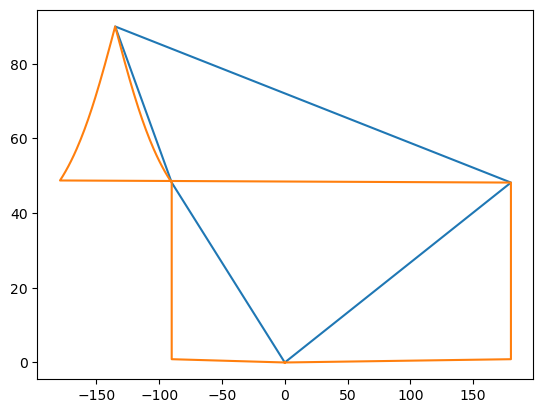

In [177]:
polyCompare(0,2)

The Polycompare function was used to test creating polygons with the full boundary points rather than just the corners

([4.5639891522016886e-17, 0.7071067811865476, 4.5639891522016886e-17, -0.7071067811865475], [0.7453559924999299, 0.7071067811865475, 0.7453559924999299, 0.7071067811865476], [0.6666666666666666, 0.0, -0.6666666666666666, 0.0])
3762
[4.56398915e-17 7.45355992e-01 6.66666667e-01]


/tmp/ipykernel_18590/4250558319.py:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(new_x, new_y, new_z, c=np.random.rand(3,), s=1)


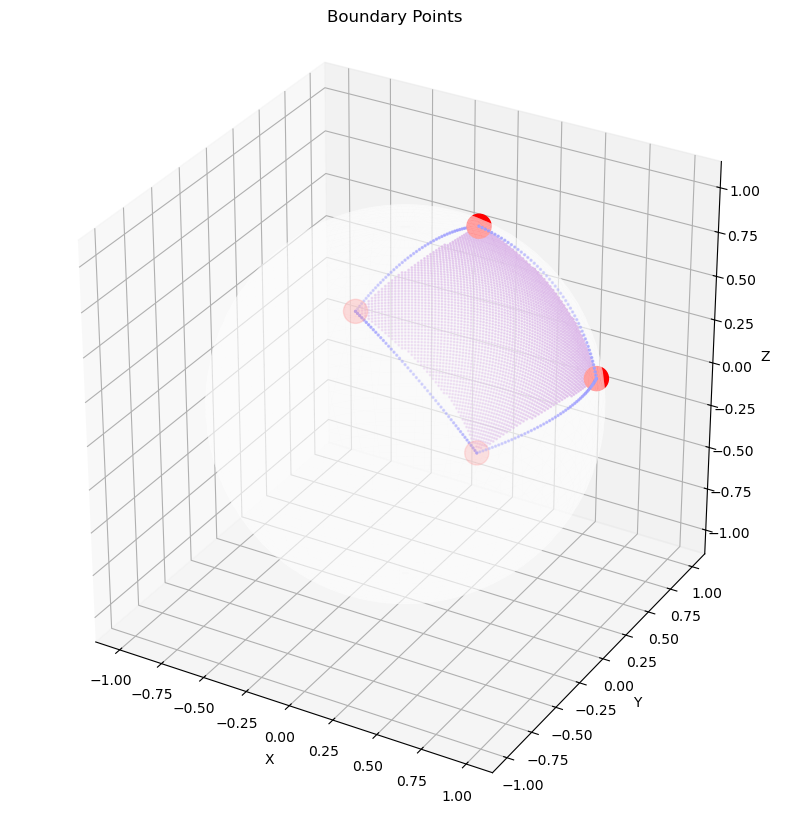

In [178]:
main(0, 5)


The main method was adjusted to show the boundaries as well

In [117]:
arc12

array([[0.        , 0.        , 1.        ],
       [0.01531374, 0.        , 0.99988274],
       [0.03082766, 0.        , 0.99952471],
       [0.04653428, 0.        , 0.99891669],
       [0.06242537, 0.        , 0.99804963],
       [0.07849187, 0.        , 0.99691475],
       [0.09472399, 0.        , 0.99550357],
       [0.11111111, 0.        , 0.99380799],
       [0.12764188, 0.        , 0.99182032],
       [0.14430417, 0.        , 0.98953338],
       [0.16108512, 0.        , 0.98694052],
       [0.17797116, 0.        , 0.9840357 ],
       [0.19494807, 0.        , 0.98081357],
       [0.21200099, 0.        , 0.97726945],
       [0.22911447, 0.        , 0.97339949],
       [0.24627255, 0.        , 0.96920061],
       [0.26345883, 0.        , 0.96467064],
       [0.28065647, 0.        , 0.95980828],
       [0.29784837, 0.        , 0.95461319],
       [0.31501715, 0.        , 0.94908598],
       [0.33214527, 0.        , 0.94322824],
       [0.34921515, 0.        , 0.93704257],
       [0.